# 2-Principal-Component-Analysis

Follow the notebook to understand the background and implementation of the second unsupervised learning technique,as well as a dimensionality reduction method, Principal Component Analysis,  using built-in libraries and functions followed by a visualization of their associated graphs and analysis of their accuracy.

First, we need to setup the dependencies and import the dataset.

In [1]:
#import the libraries and classes
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme()

## Background/Basic Demonstration

First, we will create some artifical data to better understand how dimensionality reduction works.

Create a random set of numbers with size 200 x 2. By plotting it, we can see that it is not a symmetrical set and we want to find the center point.

Text(0.5, 1.0, 'Artifical Data')

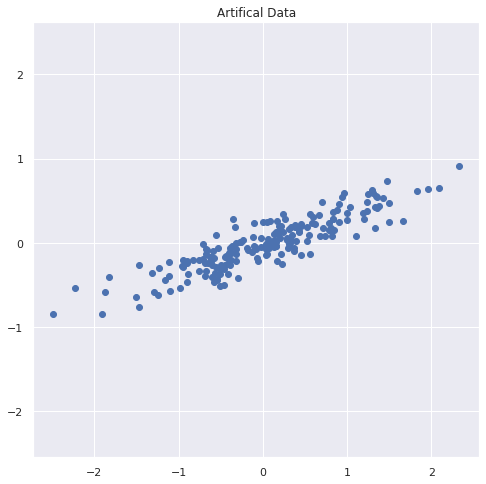

In [2]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2,2), rng.randn(2, 200)).T 

plt.figure(figsize = (8, 8))
plt.scatter(X[:, 0], X[:, 1])
plt.axis("equal")
plt.title('Artifical Data')

In [3]:
#find the center through the difference of means and SVD
X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)

In [4]:
c1 = Vt[:, 0]
c2 = Vt[:, 1]

In [5]:
#using sklearn libraries, we use PCA to find the center

from sklearn.decomposition import PCA

pca = PCA(n_components=2) #keep 2 components (the min)
pca.fit(X)

#print the directions of maximum variance & the amount of variance of each component
print(f"Directions of max Variance: {pca.components_} \n") #add the = if out of colab
print(f"Amount of Variance: {pca.explained_variance_}")

Directions of max Variance: [[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]] 

Amount of Variance: [0.7625315 0.0184779]


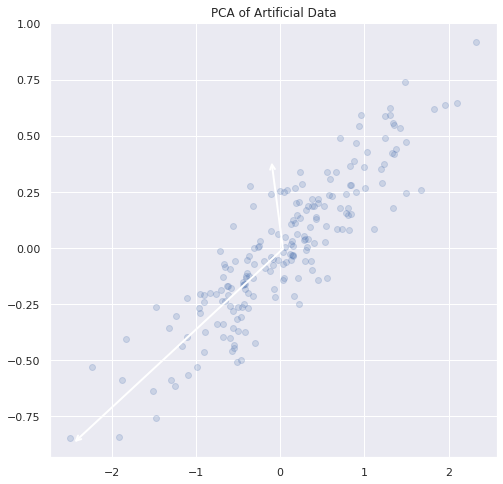

In [6]:
#function to draw the arrows on the data
def draw_vectors(v0, v1, ax = None):
  ax = ax or plt.gca()
  arrowprops = dict(arrowstyle = "<-", linewidth = 2, shrinkA = 0, shrinkB = 0)
  ax.annotate("", v0, v1, arrowprops = arrowprops)

#plot the data with the found directions
plt.figure(figsize=(8,8))
plt.scatter(X[:, 0], X[:, 1], alpha = 0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
  v = vector * 3 * np.sqrt(length)
  draw_vectors(pca.mean_, pca.mean_ + v)
plt.title('PCA of Artificial Data')
plt.show()

We can see how helpful dimensionality reduction can be in finding features of large dataset and later scaling it to better fit your calculations and models

## Implementation with Real Data

### Pre-Process Data

Before implementing the algorithm, we want to examine our input data to see whether it will serve our purpose. Here, a dataset containing red and white wine ratings is loaded in.

Note that the each wine dataframe is 1599 rows x 13 columns. We are going to append the two dataframes together to better examine and prove whether dimensionality reduction works.

In [7]:
#load in the files

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

white_wine = pd.read_csv('winequality-red.csv', sep=';')
red_wine = pd.read_csv('winequality-red.csv', sep=';')

wines = red_wine.append(white_wine, ignore_index=True)

In [8]:
white_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


To better understand the input data, we plot a heat map to see the relationships between variables. Note that both the red and white wine correlations are symmetric, meaning our PCA result should also be symmetric.

Text(0.5, 1.0, 'White wine')

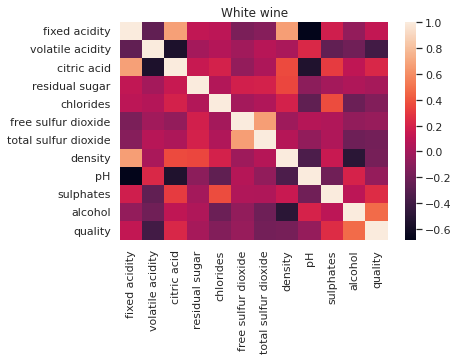

In [9]:
sns.heatmap(white_wine.corr())
plt.title('White wine')

Text(0.5, 1.0, 'red wine')

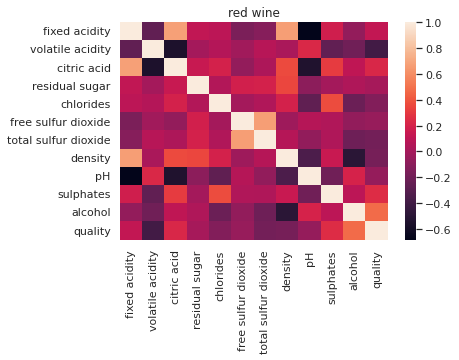

In [10]:
sns.heatmap(red_wine.corr())
plt.title('red wine')

Here you can see that the size of the dataframe is now 3198 rows since we appended the two types of wine together.

In [11]:
df1 = wines
df1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
3193,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
3194,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
3195,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
3196,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### PCA Implementation

Using te sklearn Standard Scalar, we can easily fit the data and run it through the sklearn PCA function to return the variance components of the input.

In [12]:
scaling = StandardScaler()
scaling.fit(df1)
scaled_data = pd.DataFrame(scaling.transform(df1))

#specify how many components to keep
pca = PCA(n_components=5)
pca.fit(scaled_data)
x = pca.transform(scaled_data)

x_df = pd.DataFrame(x)
#print out the pre and post processing dataframe shapes
print(f"{wines.shape } \n")
print(f"{x.shape} \n")

(3198, 12) 

(3198, 5) 



After running the PCA, we can see that the dataframe has shrunk by 8 columns, even though the rows are the same.

Below is the new heatmap shows there are no correlations between the data, as expected.

Text(0.5, 1.0, 'Post PCA Processing')

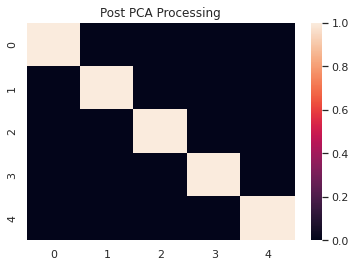

In [13]:
sns.heatmap(x_df.corr())
plt.title('Post PCA Processing')

In [14]:
#each component's variance, note that it gets smaller!
pca.explained_variance_

array([3.12214398, 2.24258329, 1.6834461 , 1.21540092, 0.97356805])

## Third Implementation with SkLearn dataset

Mimicking the in-class example, we implement PCA using the SkLearn Diabetes Samples Dataset, with a total of 442 samples (rows) x 10 columns of info including age, sex, and numerous samples.

In [15]:
from sklearn.datasets import load_diabetes
data = load_diabetes() 

#processing data

#look at the keys using the dictionary.keys()
print(f"{data['data'].shape } \n")
print(f"{data['feature_names']} \n")

df1 = pd.DataFrame(data['data'], columns = data['feature_names'])

(442, 10) 

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'] 



In [16]:
df1

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


Text(0.5, 1.0, 'Initial Correlation')

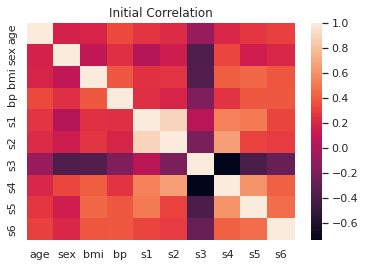

In [17]:
sns.heatmap(df1.corr())
plt.title('Initial Correlation')

We see here that the input data is once again symmetric, meaning that our correlation should also be symmetric.

In [18]:
#implement the fitting and PCA function as before
scaling = StandardScaler()
scaling.fit(df1)
scaled_data = scaling.transform(df1)

#here we specify 5 components
pca = PCA(n_components=5)
pca.fit(scaled_data)
x = pca.transform(scaled_data)

x_df = pd.DataFrame(x)
print(f"{data['data'].shape } \n")
print(f"{x.shape} \n")

(442, 10) 

(442, 5) 



After running the PCA, we can see that the dataframe has shrunk in half, even though the rows are the same.

And as expected, the post PCA correlation is symmetric, but has no correlation at this point since we reduced the dimensions.

Text(0.5, 1.0, 'Post PCA Processing')

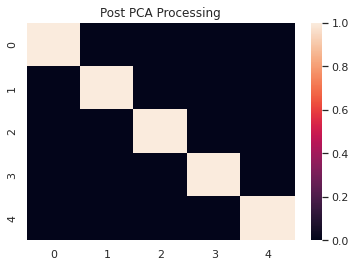

In [19]:
sns.heatmap(x_df.corr())
plt.title('Post PCA Processing')

To better see the variances of PCA, we plot a color coordination of the different samples.

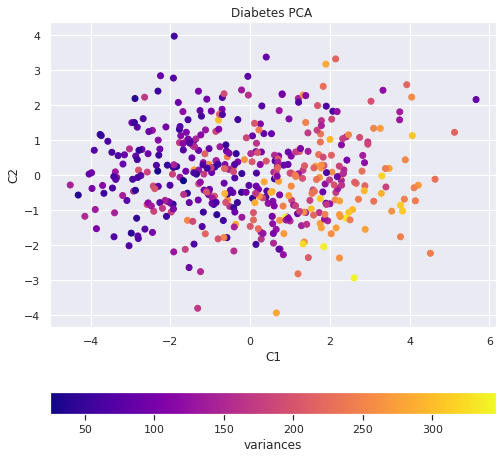

In [20]:
plt.figure(figsize = (8,8))
plt.scatter(x[:, 0], x[:, 1], c = data["target"], cmap = "plasma")
plt.xlabel("C1")
plt.ylabel("C2")
plt.colorbar(label='variances', orientation="horizontal")
plt.title('Diabetes PCA ')
plt.show()